# Week 6 Lab: Unsupervised Learning

# Introduction

<img align="right" style="padding-right:10px;" src="figures_wk6/kmeans.png" width=300><br>

This week's assignment will focus completeing a K-Means analysis.

## Our Dataset: 
**Dataset:** student-mat.csv

**More information:**
    
- [student.txt](assign_wk6\student.txt) 
- [data source](https://archive.ics.uci.edu/ml/datasets/student+performance#)

### Summary of Data

This data was derived from an analysis of two portugese schools to assess the students' achievements. It was aquired via questionaires. We will use the data from the student's math courses. Disregard the final note on the student.txt file linked above since we will only be using one dataset for our purposes. This assignment will present my ability to conduct k-means analysis and refine clustering techniques.

 
 **From the data source:**

>_**Important note:** the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful_


### Import the data:

In [262]:
import pandas as pd
import numpy as np

In [263]:
df = pd.read_csv('assign_wk6\student-mat.csv', delimiter=';')

## Unsupervised Lab

**Objective:** 
   - Use <a href='#kmeans'>K-Means</a> for this analysis
   - <a href='#cluster'>Cluster</a> the students to see if there are some natural groupings
   - Use PCA to <a href='#pltclusters'>plot the clusters</a>
   - Discover any <a href='#insights'>insights</a> from this analysis? (include numbers/graphs corresponding to your reasoning)

**Things to keep in mind:**
* <a href='#EDA'>EDA</a>!!!  Explore your data!
* Does the dataset have <a href='#Missing Values'>missing values</a>
* What about <a href='#columns'>categorical vs numeric columns</a> in your dataset?
* Do you think you should <a href='#norm'>normalize<a/> your data?

## <a id='EDA'>EDA</a>

Let's explore the data first.

In [264]:
df.shape

(395, 33)

In [265]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [266]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

Reference notes:

- Two different schools
- Ages 15-22
- Urban or Rural
- Family size: Less than or equal to three (never 0)
- Parents together or apart
- Parents education greater than or equal to three has completed high school or beyond. Less than 3 did not reach 10th grade.
- Guardian is main caretaker.
- Commute is less than 15 minutes to greater than 1 hour.
- Study time is less than 2 hours to greater than 10 hours a week.
- When 'failures' reads for it can be greater than or equal to 4.
- Paid means extra paid math classes.
- Family relationship is scaled 1 to 5, very bad to excellent.
- Free time is scaled 1 to 5, very low to very high.
- Going out is scaled 1 to 5, very low to very high.
- Workday alcohol consumption is scaled 1 to 5, very low to very high.
- Weekend alcohol consumption is scaled 1 to 5, very low to very high.
- Current health status is scaled 1 to 5, very bad to very good.
- Number of absences is 0 to 93.
- Grades are numeric from 0 to 20, G1 first period, G2 second period, G3 final period. Reference the above notes from the data for further insight into the predetermined grade correlations.

In [267]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


Highlights from the above information:
   - Average age around 16-17 with a low std, the majority is around 15-17.
   - Mother and Father educations are averaging under high school with a greater number of mothers with higher education than fathers.
   - The majority of commutes are less than 15 minutes away.
   - The average study time is 2-5 hours with the most data within that period or less. 
   - There are very few failures.
   - The average family relationship level is almost a 4 which means there are more great and excellent relationships than bad ones.
   - Free time is fair with most students rating a 3 or above. There is a similar distribution to "goout" though there is a greater amount of ratings below a 3. Those with the free time may not be using it to go out with friends.
   - Weekend alcohol consumption is greater (majority under 3) than workday alcohol consumption (majority under 2).
   - Overall health is greater than fair with the majority of the data beingfrom 3-5.
   - Absences shows large outliers with a maximum absence of 75 days while the majority of the data is under 8 days. The average is almost 6 days abscent but this summary statistic definitely being skewed by the max.
   - The grades are all averaging around 10 which I would view as a 50% since the max is 20. I am curious how the final grade max can be 20 if the period grades max at 19. See table below for reference to grades on a 100% based scale. The majority of students performed below 65%. A failure might be a grade of 0. In my experience in America our grades below 65% are considered a failure.
   
Data Input | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 16 | 17 | 18 | 19 | 20 |
:----------|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
**Grade %** | 0 | 5 | 10 | 15 | 20 | 25 | 30 | 35 | 40 | 45 | 50 | 55 | 60 | 65 | 70 | 75 | 80 | 85 | 90 | 95 | 100 |

In [268]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set() 

Let's confirm those outliers:

<AxesSubplot:>

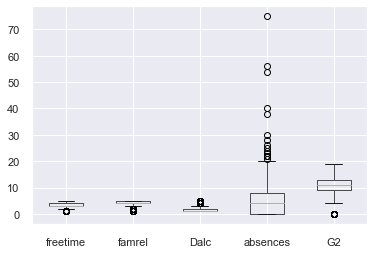

In [269]:
df.boxplot(['freetime', 'famrel', 'Dalc', 'absences', 'G2'])

I was correct about the outliers in absences. I don't see a reason to remove outliers because they have useful data. This may change when I form my data analysis questions.

<function matplotlib.pyplot.show(close=None, block=None)>

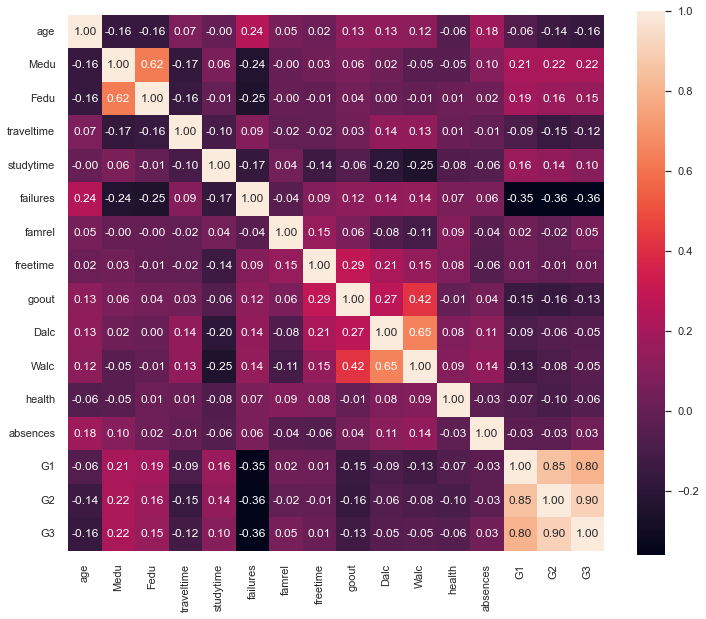

In [270]:
corrmat= df.corr()
f, ax = plt.subplots(figsize=(12,10))
hm = sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f')
plt.show

**Remarkable positive correlations: ( 0.4 < n <= 1.0 )**
   - G1, G2, and G3 vs G1, G2, and G3
   - Workday Alcohol Consumptions vs Weekend Alcohol Consumption
   - Weekend Alcohol Consumption vs Going out with friends
   - Mother's education vs Father's education

**Small positives: ( 0.1 <= n < 0.4 )**
   - Age vs Failures, going out, alcohol consumption, abscences
   - Parents' education vs Grades, absences
   - Father's education vs Grades (noteably G1)
       - Mother's Education has a greater positive correlation with grades
   - Commute time vs alcohol consumption
   - Study time vs Grades   
   - Failures vs age, going out, alcohol Consumption
   - Family Relationships vs free time
   - Free time vs family relationships, going out, alcohol consumption
   - Going out vs age, failures, free time, workday alcohol consumption
   - Workday alcohol consumption vs age, commute, failures, freetime, going out, abscences
   - Weekend Alcohol consumption vs age, commute, failures, freetime, abscences
   - Abscences vs age, mothers education, alcohol consumption
   - Grades vs parents' education, studytime

**No correlations: ( -0.05 <= n <= 0.05 )**
   - Age vs study time, family relationships, freetime
   - Mothers education vs family relationships, freetime, alcohol consumption, health
   - Father's education vs study time, family relationships, freetime, going out, alcohol consumption, health, absences
   - Commute time vs family relationships, freetime, going out, health, absences
   - Study time vs age, father's education,  family relationships, 
   - Failures vs family relationships
   - Family Relationships vs age, parents' educations, commute, study time, failures,absences grades
   - Free time vs age, parents' educations, commute, grades
   - Going out vs fatehr's education, commute, health, absences
   - Workday alcohol consumption vs parents' education, G3
   - Weekend Alcohol consumption vs parents' education, G3
   - Health vs parents' education, commute, going out, absences
   - Absences vs father's education, commute, family relationships, going out, health, grades
   - G1 and G2 vs family relationships, free time, absences
   - G3 vs family relationships, free time, absences, alcohol consumption

**Remarkable negative correlations: ( -1.0 <= n <= -0.15 )**
   - Age vs parents' education, G3
   - Parents' Education vs age, commute, failures
   - Commute vs age, parents' education, G2
   - Study time vs failures, alcohol consumption
   - Failures vs parents' education, study time, grades
   - Going out vs G1 and G2
   - Alcohol Consumption vs study time
   - Grades vs Failures, Age, Commute, Going out

In [271]:
df.drop(columns=['Fedu', 'traveltime' ,'famrel','goout','health', 'G1', 'G2', 'G3'], inplace=True)

Family relationships may not be needed.

## <a id='Missing Values'>Missing Values?</a>

In [272]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Mjob          0
Fjob          0
reason        0
guardian      0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
freetime      0
Dalc          0
Walc          0
absences      0
dtype: int64

There are no missing values 😁🙌🎂

## <a id='columns'>Explore the categorical vs numeric columns:</a>

To make this a little easier I am very interested in the outliers within the absences. I want to know what other datapoints may point to such great absences.

In [273]:
df.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Mjob           5
Fjob           5
reason         4
guardian       3
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
freetime       5
Dalc           5
Walc           5
absences      34
dtype: int64

In [274]:
df.select_dtypes(include=['object']).columns.tolist()

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

Above are Categorical

Below are Numerical

[source](https://stackoverflow.com/questions/29803093/check-which-columns-in-dataframe-are-categorical) by Shikar Omar

In [275]:
df.select_dtypes(exclude=['object']).columns.tolist()

['age',
 'Medu',
 'studytime',
 'failures',
 'freetime',
 'Dalc',
 'Walc',
 'absences']

I have already done so much analysis on the numerical values. I will now categorize some scatterplots using the categorical values and see if I can find any correlations visually.

<AxesSubplot:xlabel='absences', ylabel='Count'>

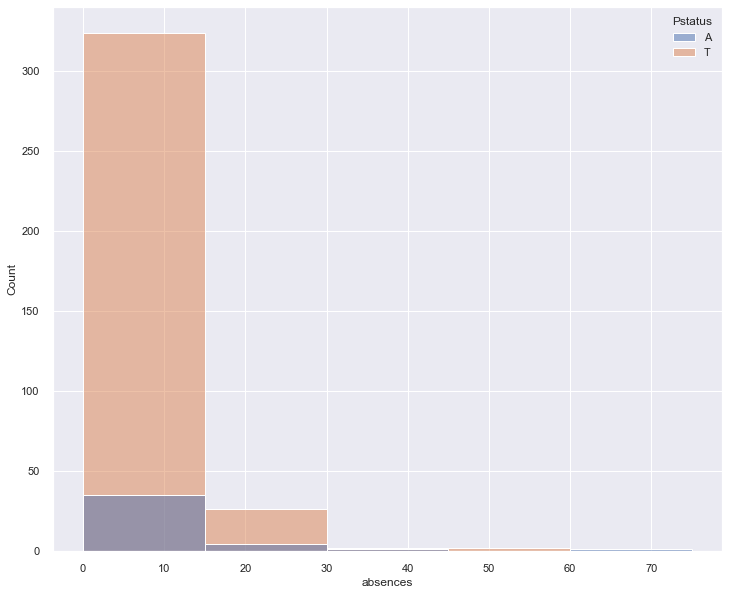

In [276]:
f, ax = plt.subplots(figsize=(12,10))
sns.histplot(data=df, x='absences', hue='Pstatus', bins=5)

<AxesSubplot:xlabel='Pstatus', ylabel='absences'>

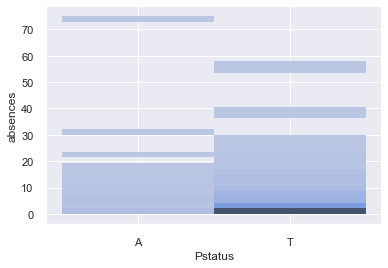

In [277]:
sns.histplot(data=df, x='Pstatus', y='absences')

<AxesSubplot:xlabel='Dalc', ylabel='absences'>

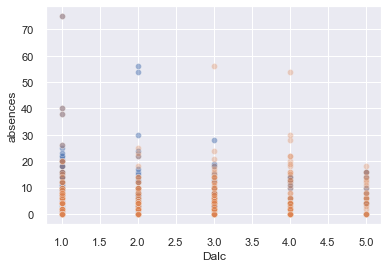

In [278]:
sns.scatterplot(data=df, x='Dalc', y='absences', alpha=0.5)
sns.scatterplot(data=df, x='Walc', y='absences', alpha=0.33)

<AxesSubplot:xlabel='reason', ylabel='absences'>

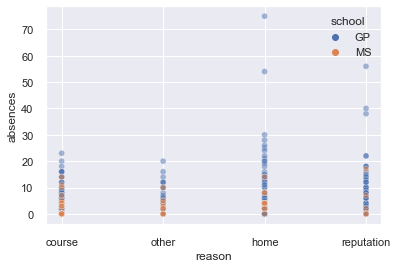

In [279]:
sns.scatterplot(data=df, x='reason', y='absences', hue='school', alpha=0.5)

<AxesSubplot:xlabel='reason', ylabel='absences'>

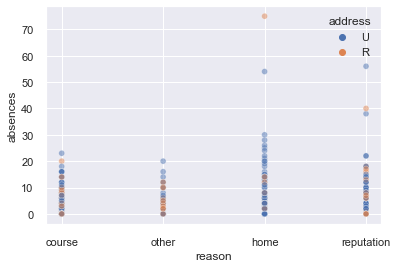

In [280]:
sns.scatterplot(data=df, x='reason', y='absences', hue='address', alpha=0.5)

<AxesSubplot:xlabel='failures', ylabel='absences'>

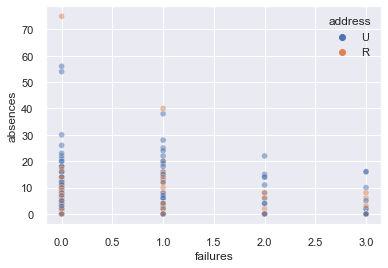

In [281]:
sns.scatterplot(data=df, x='failures', y='absences', hue='address', alpha=0.5)

<AxesSubplot:xlabel='age', ylabel='absences'>

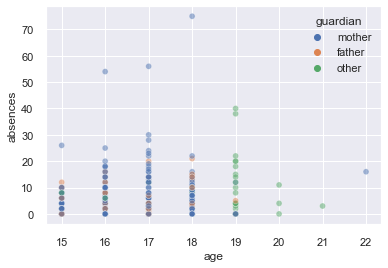

In [282]:
sns.scatterplot(data=df, x='age', y='absences', hue='guardian', alpha=0.5)

For the sake of the analysis I will convert the categorical data into numerical.

In [283]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['school'] = le.fit_transform(df['school'])
df['sex'] = le.fit_transform(df['sex'])
df['address'] = le.fit_transform(df['address'])
df['famsize'] = le.fit_transform(df['famsize'])
df['Pstatus'] = le.fit_transform(df['Pstatus'])
df['Mjob'] = le.fit_transform(df['Mjob'])
df['Fjob'] = le.fit_transform(df['Fjob'])
df['reason'] = le.fit_transform(df['reason'])
df['guardian'] = le.fit_transform(df['guardian'])
df['schoolsup'] = le.fit_transform(df['schoolsup'])
df['famsup'] = le.fit_transform(df['famsup'])
df['paid'] = le.fit_transform(df['paid'])
df['activities'] = le.fit_transform(df['activities'])
df['nursery'] = le.fit_transform(df['nursery'])
df['higher'] = le.fit_transform(df['higher'])
df['internet'] = le.fit_transform(df['internet'])
df['romantic'] = le.fit_transform(df['romantic'])

In [284]:
cormat = df.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

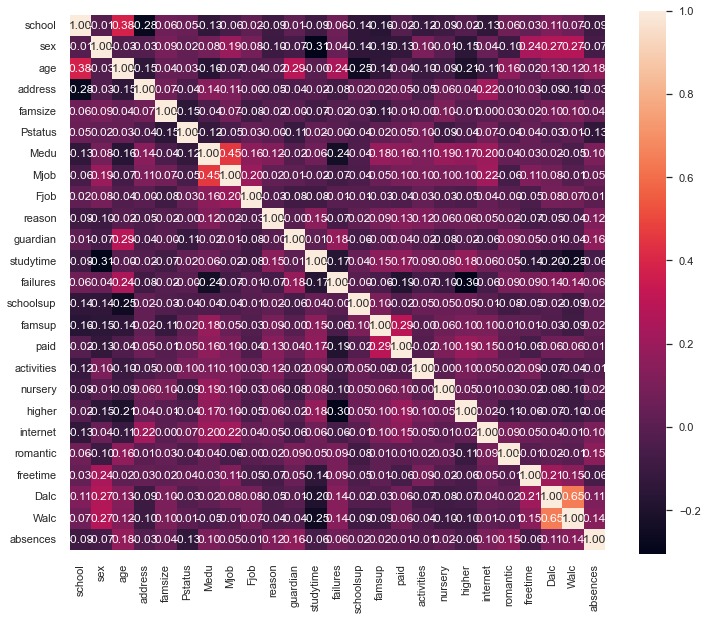

In [285]:
f, ax = plt.subplots(figsize=(12,10))
hm = sns.heatmap(cormat, cbar=True, annot=True, square=True, fmt='.2f')
plt.show

In [286]:
df.drop(columns=['address','famsize','Mjob', 'Fjob', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery'], inplace=True)

## <a id='norm'>Should we normalize the data?</a>

I wouldn't want to in order to understand the absences more.

## <a id='kmeans'>K-Means</a>

In [287]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [288]:
df.shape

(395, 16)

In [289]:
X = df.iloc[:,0:16]
y = df.iloc[:,-1]

In [290]:
from sklearn.cluster import KMeans

sum_sq= []

for n in range (2,30):
    print('Calculating for ',n,' clusters')
    
    model = KMeans(n_clusters=n, random_state=42)
    model.fit(X)
    sum_sq.append(-model.score(X))

Calculating for  2  clusters
Calculating for  3  clusters
Calculating for  4  clusters
Calculating for  5  clusters
Calculating for  6  clusters
Calculating for  7  clusters
Calculating for  8  clusters
Calculating for  9  clusters
Calculating for  10  clusters
Calculating for  11  clusters
Calculating for  12  clusters
Calculating for  13  clusters
Calculating for  14  clusters
Calculating for  15  clusters
Calculating for  16  clusters
Calculating for  17  clusters
Calculating for  18  clusters
Calculating for  19  clusters
Calculating for  20  clusters
Calculating for  21  clusters
Calculating for  22  clusters
Calculating for  23  clusters
Calculating for  24  clusters
Calculating for  25  clusters
Calculating for  26  clusters
Calculating for  27  clusters
Calculating for  28  clusters
Calculating for  29  clusters


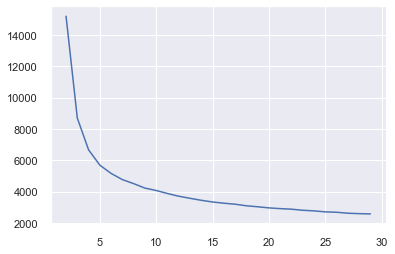

In [291]:
plt.plot(range(2, 30), sum_sq, 'bx-')

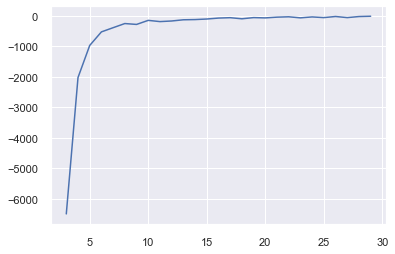

In [292]:
plt.plot(range(3, 30), np.diff(sum_sq), 'bx-')

I will use k=8 for my number of clusters

In [293]:
model = KMeans(n_clusters=6, random_state=42)
model.fit(X)
preds= model.predict(X)

In [294]:
from sklearn import metrics
score = metrics.silhouette_score(X, preds)
score

0.2604624189996892

Sad face, poor mean over all the samples.

## <a id='cluster'>Cluster students</a>

Are there any natural groupings?

I would assume the natural groupings would be from the categorical data, age, parents' educations, alcohol consumptions, and any other ordinal categorical data types.

In [295]:
model.cluster_centers_

array([[9.80392157e-02, 4.70588235e-01, 1.70784314e+01, 8.23529412e-01,
        3.07843137e+00, 1.49019608e+00, 9.01960784e-01, 2.05882353e+00,
        3.33333333e-01, 1.00000000e+00, 8.82352941e-01, 4.50980392e-01,
        3.33333333e+00, 1.70588235e+00, 2.56862745e+00, 1.16862745e+01],
       [1.26984127e-01, 4.76190476e-01, 1.65238095e+01, 9.31216931e-01,
        2.60317460e+00, 1.07936508e+00, 7.88359788e-01, 2.04761905e+00,
        3.22751323e-01, 9.31216931e-01, 8.09523810e-01, 3.06878307e-01,
        3.23280423e+00, 1.32275132e+00, 2.02116402e+00, 7.98941799e-01],
       [1.38777878e-17, 5.55111512e-17, 1.70000000e+01, 6.66666667e-01,
        3.00000000e+00, 1.66666667e+00, 1.00000000e+00, 2.00000000e+00,
        0.00000000e+00, 6.66666667e-01, 1.00000000e+00, 6.66666667e-01,
        2.33333333e+00, 1.66666667e+00, 2.66666667e+00, 6.16666667e+01],
       [1.33333333e-01, 4.91666667e-01, 1.66083333e+01, 8.91666667e-01,
        2.78333333e+00, 1.38333333e+00, 8.58333333e-01, 2.091

## <a id='pltclusters'>PCA for Plotting Clusters</a>

Text(0.5, 1.0, 'Projection of the clustering on a the axis of the PCA')

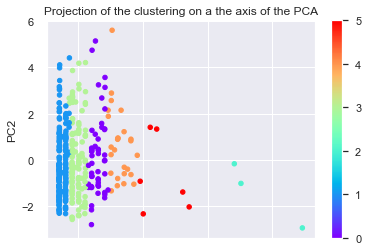

In [296]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_reduced = pca.fit_transform(X)
data_reduced = pd.DataFrame(data_reduced)

ax = data_reduced.plot(kind='scatter', x=0, y=1, c=preds, cmap='rainbow')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Projection of the clustering on a the axis of the PCA')

In [297]:
for n in range (2,30):
    model = KMeans(n_clusters=n, random_state=42)
    model.fit(X)
    preds= model.predict(X)
    score = metrics.silhouette_score(X, preds)
    print('Silhouette score for ',n,' clusters: ',score)

Silhouette score for  2  clusters:  0.5759528251550106
Silhouette score for  3  clusters:  0.52240233318226
Silhouette score for  4  clusters:  0.3558283065410621
Silhouette score for  5  clusters:  0.27833945177956154
Silhouette score for  6  clusters:  0.2604624189996892
Silhouette score for  7  clusters:  0.22702045795754808
Silhouette score for  8  clusters:  0.1604959370405328
Silhouette score for  9  clusters:  0.15930699386395697
Silhouette score for  10  clusters:  0.1457643248552095
Silhouette score for  11  clusters:  0.15298148363492953
Silhouette score for  12  clusters:  0.15271917249247716
Silhouette score for  13  clusters:  0.14045622375217737
Silhouette score for  14  clusters:  0.1453643197518783
Silhouette score for  15  clusters:  0.14652632479921363
Silhouette score for  16  clusters:  0.13028010722500788
Silhouette score for  17  clusters:  0.1346910981809686
Silhouette score for  18  clusters:  0.13902807523608915
Silhouette score for  19  clusters:  0.1351913329

Of course 2 performed the best, but isn't that overfitting?

In [298]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(X)

preds= model.predict(X)

from sklearn import metrics
score = metrics.silhouette_score(X, preds)
score

0.52240233318226

Text(0.5, 1.0, 'Projection of the clustering on a the axis of the PCA')

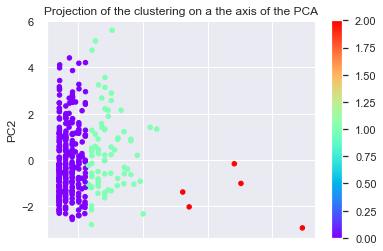

In [300]:
pca = PCA(n_components=3)
data_reduced = pca.fit_transform(X)
data_reduced = pd.DataFrame(data_reduced)

ax = data_reduced.plot(kind='scatter', x=0, y=1, c=preds, cmap='rainbow')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Projection of the clustering on a the axis of the PCA')

In [301]:
df.nunique()

school        2
sex           2
age           8
Pstatus       2
Medu          5
reason        4
guardian      3
studytime     4
failures      4
higher        2
internet      2
romantic      2
freetime      5
Dalc          5
Walc          5
absences     34
dtype: int64

## <a id='insights'>Insights from Analysis</a>

Reasoning supported by graphs/numbers.

By removing features that were not correlated to absences I improved the clustering score. I find it difficult from what I am shown from the graphs to identify what the algorithm is using for clusters when using n_clusters=2. If I use n_clusters=3 I can assume the data is being divided by the lower numerical data. To answer a question I had above: with greater clusters produces greater overfitting hence why the silhoutte score was lower with every increasing cluster. [source for demo](https://www.askpython.com/python/examples/plot-k-means-clusters-python) Below I am demoing another way to visualize the clusters. I am still unsure what the clusters are which doesn't exactly help me right now.

In [304]:
#Importing required modules
 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data
data = df
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data)
 
df.shape

(395, 2)

In [314]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 2)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
print(label)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0]


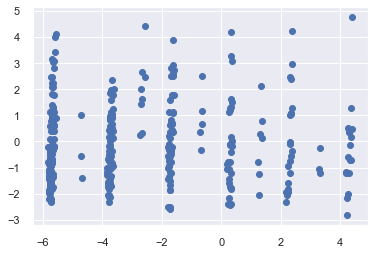

In [315]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = df[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

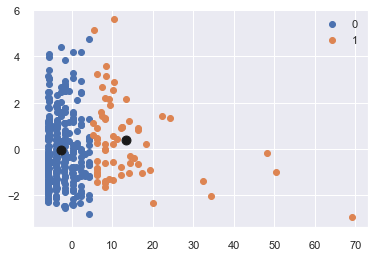

In [316]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

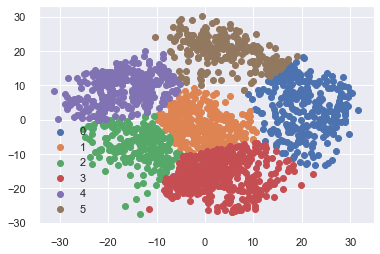

In [318]:
#Importing required modules
 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data
data = load_digits().data
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data)
 
#Import KMeans module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 6)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

I suppose this analysis can help determine the proper number of clusters or splits for unsupervised learning algorithms like heirarchial clustering, etc. It would also help with supervised learning for decision tree and KNN classification or regression analysis to predict the characteristics of a student who is absent. Observations like this may be used to improve attendence by accomodating those lifestyles and interests, and also improving the grades.